In [2]:
# @title IMPORTING IMPORTANT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# @title IMPORTING DATASET
from google.colab import files
uploaded = files.upload()

Saving IMDb Movies India.csv to IMDb Movies India.csv


In [4]:
import io
imdb_df = pd.read_csv((io.BytesIO(uploaded['IMDb Movies India.csv'])),encoding='unicode_escape')

In [5]:
imdb_df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [6]:
imdb_df.shape

(15509, 10)

In [7]:
# @title DATA CLEANING
imdb_df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
imdb_df.duplicated().sum()

6

In [9]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [10]:
imdb_df.dropna(inplace = True)

In [11]:
imdb_df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [12]:
imdb_df.drop_duplicates(inplace= True)

In [13]:
imdb_df.shape

(5659, 10)

In [14]:
imdb_df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [15]:
imdb_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [16]:
# @title DATA PROCESSING
imdb_df['Year'] = imdb_df['Year'].str.replace(r'[()]', '', regex=True).astype(int)

In [17]:
imdb_df['Duration'] = pd.to_numeric(imdb_df['Duration'].str.replace(' min', ''))

In [18]:
imdb_df['Votes'] = pd.to_numeric(imdb_df['Votes'].str.replace(',', ''))

In [19]:
imdb_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [20]:
imdb_df['Genre'] = imdb_df['Genre'].str.split(', ')
imdb_df = imdb_df.explode('Genre')
imdb_df['Genre'].fillna(imdb_df['Genre'].mode()[0], inplace=True)

In [21]:
imdb_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


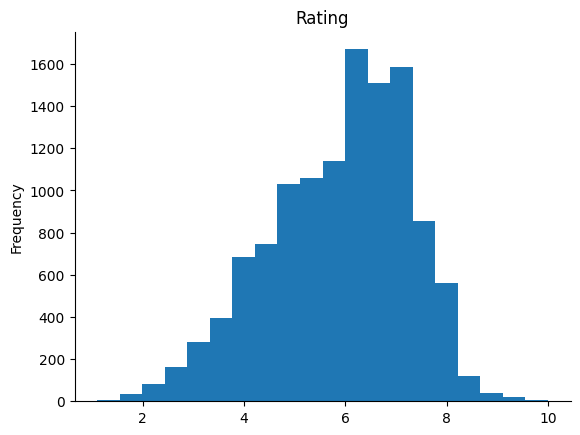

In [22]:

imdb_df['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [23]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11979 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11979 non-null  object 
 1   Year      11979 non-null  int64  
 2   Duration  11979 non-null  int64  
 3   Genre     11979 non-null  object 
 4   Rating    11979 non-null  float64
 5   Votes     11979 non-null  int64  
 6   Director  11979 non-null  object 
 7   Actor 1   11979 non-null  object 
 8   Actor 2   11979 non-null  object 
 9   Actor 3   11979 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.0+ MB


In [24]:
# @title MODEL BUILDING
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [25]:
imdb_df.drop('Name', axis = 1, inplace= True)

In [26]:
genre_mean_rating = imdb_df.groupby('Genre')['Rating'].transform('mean')
imdb_df['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = imdb_df.groupby('Director')['Rating'].transform('mean')
imdb_df['Director_encoded'] = director_mean_rating

actor1_mean_rating = imdb_df.groupby('Actor 1')['Rating'].transform('mean')
imdb_df['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = imdb_df.groupby('Actor 2')['Rating'].transform('mean')
imdb_df['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = imdb_df.groupby('Actor 3')['Rating'].transform('mean')
imdb_df['Actor3_encoded'] = actor3_mean_rating

In [27]:
X = imdb_df[['Year', 'Votes', 'Duration', 'Genre_mean_rating', 'Director_encoded', 'Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y= imdb_df['Rating']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
Model = LinearRegression()
Model.fit(X_train, y_train)
Model_pred = Model.predict(X_test)

In [30]:
print('The performance evaluation of Logistic Regression is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, Model_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, Model_pred))
print('R2 score: ',r2_score(y_test, Model_pred))

The performance evaluation of Logistic Regression is below:  

Mean squared error:  0.4465441653985704
Mean absolute error:  0.4921902540765641
R2 score:  0.7641133663863862


In [31]:
# @title MODEL TESTING
X.head()

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,8,109,6.056744,7.000000,6.850000,7.00,7.00
3,2019,35,110,5.751042,4.400000,5.250000,4.40,4.46
3,2019,35,110,5.811087,4.400000,5.250000,4.40,4.46
5,1997,827,147,5.751042,5.335135,4.793617,5.73,5.93
5,1997,827,147,6.056744,5.335135,4.793617,5.73,5.93


In [32]:
y.head()

1    7.0
3    4.4
3    4.4
5    4.7
5    4.7
Name: Rating, dtype: float64

In [33]:
data = {'Year': [2019], 'Votes': [8], 'Duration': [109], 'Genre_mean_rating': [6.056744], 'Director_encoded': [7.0], 'Actor1_encoded': [6.85], 'Actor2_encoded': [7.0], 'Actor3_encoded': [7.0]}
trail = pd.DataFrame(data)

In [34]:
rating_predicted = Model.predict(trail)
print("Predicted Rating:", rating_predicted[0])

Predicted Rating: 7.238868271047665
